<div style="background-color: lightgreen; padding: 10px; text-align: center; color: black; font-size: 32px; font-family: 'Arial', sans-serif;">
    Amazon Sentiment Sleuth: Analyzing Product Reviews + Building a Model <br>
    <h3 style="text-align: center; color: black; font-size: 15px; font-family: 'Arial', sans-serif;">Full Documentation - Suyash</h3>
</div>

<div style="background-color: lightseagreen; color: black; padding: 4px;">
    <h3>Problem statement:
</h3> </div>

**Customer reviews plays a huge role in whether a business flourishes or collapses. Online platforms like Amazon rely on these reviews to know the customer's opinion about the products as they do not have direct face to face interaction with the customers. These reviews are in text form, unstructured and varying in sentiment, often imbalanced with positive reviews being a lot more than negative reviews.**

**The amazon reviews dataset for amazon alexa is a highly imbalanced dataset with a majority of reviews being positive. However, we need to develop a sentiment analysis model using NLP techniques that can accurately classify customer reviews as positive or negative based on the text reviews provided. This helps for product improvement and increase customer satisfaction for buisinesses across online platforms.**

<div style="background-color: lightseagreen; color: black; padding: 4px;">
    <h3>Importing necessary libraries:
</h3> </div>

In [1]:
import numpy as np #for numerical computing
import pandas as pd #for data handling and manipulation
import matplotlib.pyplot as plt #for data visualization
import seaborn as sns #for data visualization
import nltk #natural language tool kit
from nltk.corpus import stopwords #stopwords
from nltk.tokenize import word_tokenize #tokenizer
import string #convert to lowercase
from nltk.stem import WordNetLemmatizer #lemmatizer
from nltk.corpus import wordnet
from nltk import pos_tag #to assign POS tags to words
from sklearn.feature_extraction.text import TfidfVectorizer #to convert text to matrix of features
from sklearn.model_selection import train_test_split #to split the data into training and testing sets for model evaluation 
from sklearn.linear_model import LogisticRegression #to built the model
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay #model evaluation and visualization

In [2]:
nltk.download("punkt_tab") #for tokenization
nltk.download("stopwords") #download the stop words list
nltk.download("averaged_perceptron_tagger_eng") #for pos tagging
nltk.download("wordnet") #for lexical database
nltk.download("omw-1.4") #extended support for lemmatization

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\suyas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\suyas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\suyas\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\suyas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\suyas\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

<div style="background-color: lightseagreen; color: black; padding: 4px;">
    <h3>Data loading and inspection:
</h3> </div>

**The dataset that I am using is in tsv format. To read this dataset in python, extracting data where each field is separated by a tab character (\t).**

I am telling pandas to read it as tab separated values and not as comma separated values. The values in this dataset are not separated by commas as pandas would expect. Here I am just specifying the character where pandas has to split the columns while reading the data. 

In [3]:
df = pd.read_csv('amazon_alexa.tsv', sep='\t')

**Now that I have loaded the data, before beginning any cleaning or modeling, let's start by viewing first 5 rows.**

In [4]:
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


<div style="background-color: lightblue; color: black; padding: 4px;">
    <h4>Checking the dataset info, shape, nulls and duplicates:
</h4> </div>

In [5]:
dataset_info = df.info()
print (dataset_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB
None


**Next, let's see the shape of the dataset, that is the columns and rows.**

In [6]:
df.shape

(3150, 5)

**Of the 3150 columns and 5 rows, let's check if there are any null values.**

**Checking for null values:**

In [7]:
null_values = df.isnull().sum()
print (null_values)

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64


**Checking for duplicates:**

In [8]:
df.duplicated().sum()

715

In [9]:
df[df.duplicated()]

,rating,date,variation,verified_reviews,feedback
700,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1
701,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1
702,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1
703,5,30-Jul-18,Heather Gray Fabric,looks great,1
704,5,30-Jul-18,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


<div style="background-color: lightblue; color: black; padding: 4px;">
    <h4>Duplicates, keep or drop?
</h4> </div>

**715 rows are duplicates. This is the first time encountering so many duplicates.** 

**Often times when leaving reviews, people tend to use the same words and same lines like "I love it" or "Handy" or "Like it!" which is causing the duplicates, I think. We will see ahead how it affects the model and make changes if needed.** 

**To simulate real life case, this dataset, although being used for this project, maybe it has the same kind of duplicate reviews?** **I will not drop any duplicates for now.**

**The model is not performing well. Maybe due to lots of duplicate positive values. I will try dropping duplicates and see the performance.** 

**Dropping duplicates did not make the model better. So in the end despite having many duplicates, it is concluded that the duplicates simulate real life conditions and was not dropped.**

<div style="background-color: lightseagreen; color: black; padding: 4px;">
    <h3>Overview of the dataset:
</h3> </div>

**On the first glimpse, there are 5 columns: rating, date, variation, verified reviews and feedback.**

1. 2 columns have integers, and 3 have objects, rating and feedback are integers while the rest are objects(strings).
2. Verified reviews has one null value. All other columns have no null values. 
3. Rating is varying from 3 to 5 for the first 10 rows. I will look for rating value count and unique values further. 
4. Variation looks like it is the different colors of the device, a quick search over the internet showed that the device does indeed come in different colors and variations. 
5. The verified reviews column has the reviews and feedback has only 1 in the first 10 rows.

**To see what other values feedback has, lets see the unique values in the column feedback.**

<div style="background-color: lightblue; color: black; padding: 4px;">
    <h4>Feedback analysis:
</h4> </div>

In [10]:
feedback_count = df["feedback"].value_counts()
print ("Feedback count is:", feedback_count)

unique_feedback = df["feedback"].unique()
print ("Unique feedbacks are:", unique_feedback)

Feedback count is: feedback
1    2893
0     257
Name: count, dtype: int64
Unique feedbacks are: [1 0]


**So feedback has 1s and 0s.** 

**It looks like it is labeled as 1 for positive reviews and 0 for negative reviews. This is what we can use to train our model later. this is our target variable for sentiment analysis.**

<div style="background-color: lightblue; color: black; padding: 4px;">
    <h4>Ratings analysis:
</h4> </div>

In [11]:
unique_rating = df["rating"].unique()
print (unique_rating)

rating_count = df["rating"].value_counts()
rating_count

[5 4 3 2 1]


rating
5    2286
4     455
1     161
3     152
2      96
Name: count, dtype: int64

**This was done to see if there were any ratings like 2.5 or 4.5. Since the star ratings are integers, it cannot be floats like 4.5 which is a decimal, which makes sense. Also it was already clear in the info that rating was an integer value.** 

**I also want to see which star rating has how many counts. It will help me label the sentiment later.** 

<div style="background-color: lightblue; color: black; padding: 4px;">
    <h4>Null values:
</h4> </div>

**I am not dropping any row just because it has null values.**

**It looks like there is already so much imbalance in the dataset, with lots of 1s and few 0s.**

**In my last project, the model failed to identify 0s because of imbalance.** 

**For now, let us fill the null value with mode.**

In [12]:
df["verified_reviews"] = df["verified_reviews"].fillna(df["verified_reviews"].mode()[0])

In [13]:
null_values_after_mode = df.isnull().sum()
print (null_values_after_mode)

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64


<div style="background-color: lightseagreen; color: black; padding: 4px;">
    <h3>Quantitative analysis:
</h3> </div>

In [14]:
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


**Like we saw before when analyzing the feedback column where there were a lot of 1s.**

**This quantitative analysis did not provide any significant insight, except re-confirming the imabalance of the dataset.**

**The mean rating is 4.46 means the average rating is very high, there is a bias towards positive reviews. Again, this needs to be addressed when creating and training the model.**

<div style="background-color: lightseagreen; color: black; padding: 4px;">
    <h3>Distribution of rating and feedback:
</h3> </div>

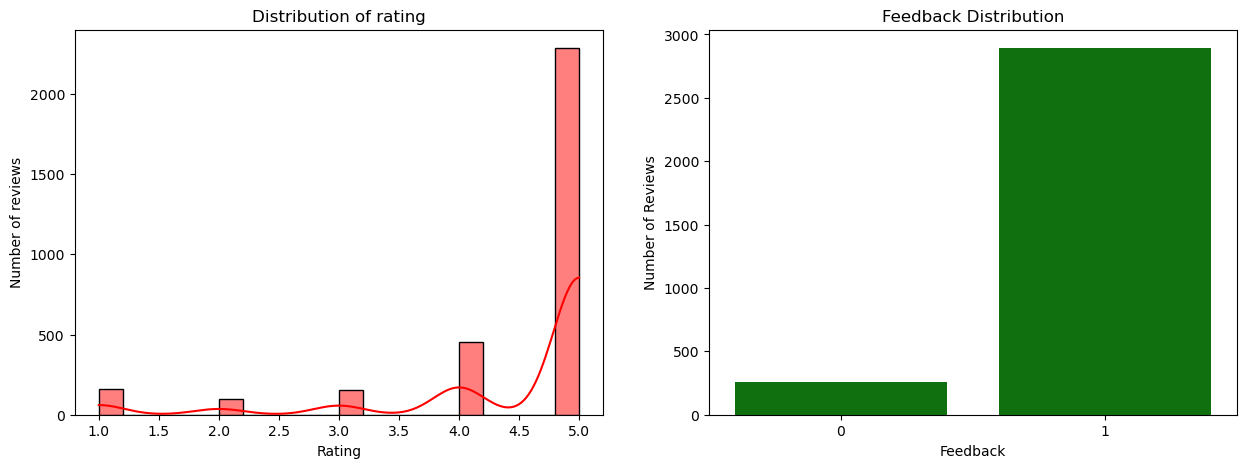

In [15]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)

sns.histplot(df["rating"], kde = "True", bins = 20, color="red")
plt.title("Distribution of rating")
plt.xlabel("Rating")
plt.ylabel("Number of reviews")

plt.subplot(1,2,2)
sns.countplot(data = df, x = "feedback", color = "green")
plt.title("Feedback Distribution")
plt.xlabel("Feedback")
plt.ylabel("Number of Reviews")

plt.show()

**This plot clearly shows that more than 2000 reviews are 5 star. 1 to 3 are very rare. The dataset is very imbalanced. Considering using 1 to 3 as negative and 4 to 5 as positive to label sentiment for now. Lets see if further analysis changes this decision.**

**We also see that most ratings are 5 and there is close to 3000 feedback value as 1.**

<div style="background-color: lightseagreen; color: black; padding: 4px;">
    <h3>So are which of the ratings are 1 and which are 0? Also, which variation of the device is mostly seen in the dataset?
</h3> </div>

**Box plot of feedback and rating should give us that visualization.**

**Let's plot a bar plot to see that.**

In [16]:
variation_count = df["variation"].value_counts()
print (variation_count)

variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64


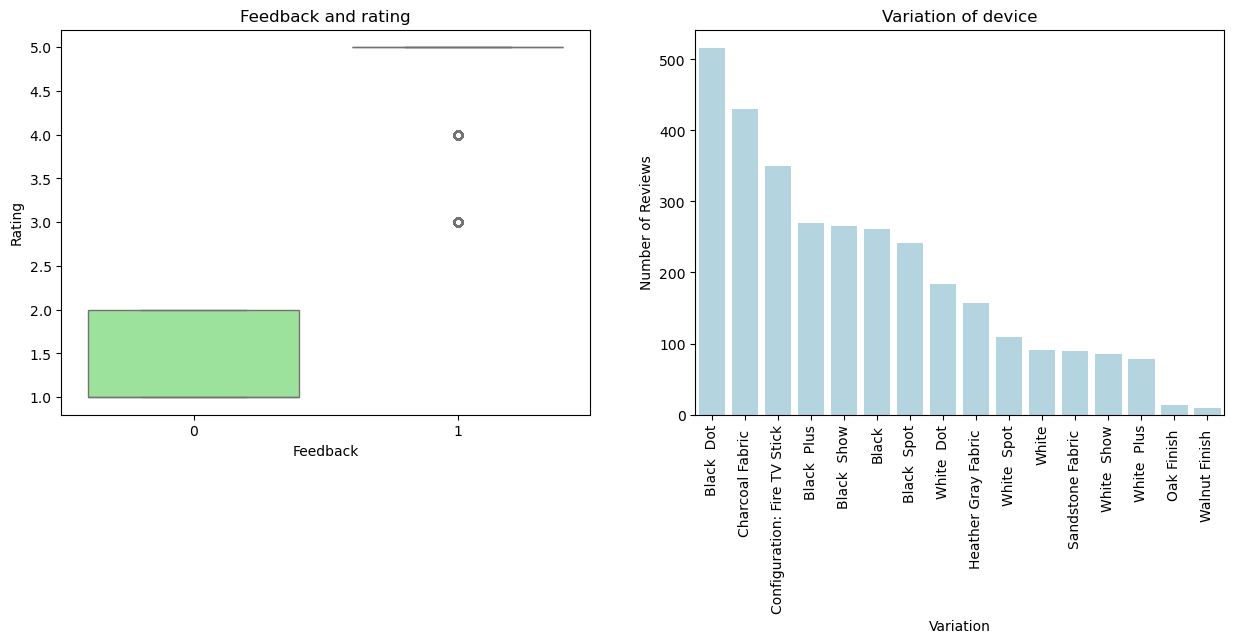

In [17]:
plt.figure(figsize = (15, 5))

plt.subplot(1,2,1)
sns.boxplot(x="feedback" , y ="rating", data = df, color = "lightgreen")
plt.title("Feedback and rating")
plt.xlabel("Feedback")
plt.ylabel("Rating")

plt.subplot(1,2,2)
sns.countplot(data = df, x = "variation", order = variation_count.index, color = "lightblue")
plt.title("Variation of device")
plt.xlabel("Variation")
plt.ylabel("Number of Reviews")
plt.xticks(rotation = 90)
plt.show()

**So negative feedback or 0 is usually by 1 or 2 star ratings.**

**Looks like there are only two ratings with 3 and 4 star which are positive, otherwise all positive sentiment is just 5 star ratings.** 

**Again this reinforces my point that the dataset has a very big class imbalance and is biased towards positive sentiment.** 

**The model will surely not identify negative sentiments unless I balance the logistic regression model.**

**Also, during sentiment labeling, we will label ratings 1 to 3 as negative and 4 to 5 as positive.**

<div style="background-color: lightblue; color: black; padding: 4px;">
    <h4> Variation analysis:
</h4> </div>

**On visualizing the different variations of the device, We see that black dot is the most reviewed variation of the product in the dataset.**

<div style="background-color: lightseagreen; color: black; padding: 4px;">
    <h3>Preprocessing with NLTK:
</h3> </div>

**Next preprocessing will be done. We will transfrom raw text into structured meaningful data. We will be doing the following:**

1. Lowercasing
2. Tokenizing
3. Removing punctuation
4. Removing stopwords
5. Lemmatizing with POS tagging

<div style="background-color: lightblue; color: black; padding: 4px;">
    <h4>Lowercasing:
</h4> </div>

In [18]:
df["lowercase_reviews"] = [str(review).lower() for review in df["verified_reviews"]]
df[["verified_reviews", "lowercase_reviews"]].head()

,verified_reviews,lowercase_reviews
0,Love my Echo!,love my echo!
1,Loved it!,loved it!
2,"Sometimes while playing a game, you can answer...","sometimes while playing a game, you can answer..."
3,I have had a lot of fun with this thing. My 4 ...,i have had a lot of fun with this thing. my 4 ...
4,Music,music


**As we can see, we have changed the all uppercase to lowercase. When we extract features, there will not be two words "Loved" and "loved" to extract from, thus ensuring consistency.**

<div style="background-color: lightblue; color: black; padding: 4px;">
    <h4> Tokenization:
</h4> </div>

In [19]:
df["tokens"] = [word_tokenize(review) for review in df["lowercase_reviews"]]
df[["lowercase_reviews","tokens"]].head()

,lowercase_reviews,tokens
0,love my echo!,"[love, my, echo, !]"
1,loved it!,"[loved, it, !]"
2,"sometimes while playing a game, you can answer...","[sometimes, while, playing, a, game, ,, you, c..."
3,i have had a lot of fun with this thing. my 4 ...,"[i, have, had, a, lot, of, fun, with, this, th..."
4,music,[music]


<div style="background-color: lightblue; color: black; padding: 4px;">
    <h4> What is tokenization? What did we just do?
</h4> </div>

**Comparing the two columns above, clearly we have successfully tokenized the reviews.**

**We just split the text into smaller unit, for example --> love my echo! --> this got tokenized into love, my, echo, !.**

**Each word and even the punctuation mark "!" became an individual token** 

**This simply makes the text easier for the computer to understand.**

<div style="background-color: lightblue; color: black; padding: 4px;">
    <h4>Punctuation removal:
</h4> </div>

**Punctuation can often be noise in text preprocessing tasks, so we remove them like commas, periods, exclamation marks etc.**

**Just like we did above, we will again use list comprehension to remove tokens.**

**What is happening:**

1. Looping through each row’s token list
2. Removing punctuation from that list
3. Storing the cleaned list in a new column

**For all possible steps to reinforce my concept, I will use list comprehension until the final steps.**

In [20]:
df["tokens_no_punct"] = [[word for word in tokens if word not in string.punctuation] for tokens in df["tokens"]]
df[["tokens", "tokens_no_punct"]].head()

,tokens,tokens_no_punct
0,"[love, my, echo, !]","[love, my, echo]"
1,"[loved, it, !]","[loved, it]"
2,"[sometimes, while, playing, a, game, ,, you, c...","[sometimes, while, playing, a, game, you, can,..."
3,"[i, have, had, a, lot, of, fun, with, this, th...","[i, have, had, a, lot, of, fun, with, this, th..."
4,[music],[music]


<div style="background-color: lightblue; color: black; padding: 4px;">
    <h4>Removing stop words:
</h4> </div>

In [21]:
stop_words=set(stopwords.words("english"))

In [22]:
df["no_stopwords_token"] = [[word for word in tokens if word not in stop_words] for tokens in df["tokens_no_punct"]]
df[["tokens_no_punct", "no_stopwords_token"]].head()

,tokens_no_punct,no_stopwords_token
0,"[love, my, echo]","[love, echo]"
1,"[loved, it]",[loved]
2,"[sometimes, while, playing, a, game, you, can,...","[sometimes, playing, game, answer, question, c..."
3,"[i, have, had, a, lot, of, fun, with, this, th...","[lot, fun, thing, 4, yr, old, learns, dinosaur..."
4,[music],[music]


**Stopwords are common, non informative words like "and","the", "my", "it" etc which we can see are removed above.**

<div style="background-color: lightblue; color: black; padding: 4px;">
    <h4> Lemmatization with POS tagging:
</h4> </div>

**Lemmatization is the process of reducing a word to its base form called a lemma ensuring that the word is returned to its correct dictionary form.**

**I am using lemmatization with pos tagging instead of stemming here because stemming cuts off parts of words.**

**Lemmatization with pos tagging considers the meaning and the context of the word to ensure the base form is grammatically correct.**

**This is very important in sentiment analysis to understand the context and ensure proper interpretation of words.**

**However, the challenge with lemmatization is that it requires more computational resources than steming because it uses a dictionary and grammatical context.**

**POS tagging:** 

When paired with Part-Of-Speech tagging, lemmatizer gains context about how the word is used, noun, verb etc resulting in more accurate transformations.

In [23]:
lemmatizer = WordNetLemmatizer()

In [24]:
def get_wordnet_pos(word):
    tag = pos_tag([word])[0][1][0].upper()
    tag_dict ={"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

In [25]:
df["final_lemmatized_clean_tokens"] = [[lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in tokens] for tokens in df["no_stopwords_token"]]

In [26]:
df[["no_stopwords_token","final_lemmatized_clean_tokens"]].head()

,no_stopwords_token,final_lemmatized_clean_tokens
0,"[love, echo]","[love, echo]"
1,[loved],[love]
2,"[sometimes, playing, game, answer, question, c...","[sometimes, play, game, answer, question, corr..."
3,"[lot, fun, thing, 4, yr, old, learns, dinosaur...","[lot, fun, thing, 4, yr, old, learns, dinosaur..."
4,[music],[music]


**As we can see, the word "loved" has been lemmatized to "love", "playing" to "play" and so on.**

<div style="background-color: lightseagreen; color: black; padding: 4px;">
    <h3>Sentiment labeling:
</h3> </div>

**From our analysis, we know that most of the "rating 5" was clustered together with "value 1 in feedback" meaning positive. We will label ratings 1,2 and 3 star as negative and 4,5 star as positive.**

**Using binary labels instead of adding neutral because there is not many ratings with 3 and 4 to even consider a neutral sentiment.**

**Let's recheck this hypothesis by counting the ratings and feedback again before we proceed.**

In [27]:
rating_count = df["rating"].value_counts()
print ("Rating count:",rating_count)

feedback_count = df["feedback"].value_counts()
print ("Feedback count is:", feedback_count)

Rating count: rating
5    2286
4     455
1     161
3     152
2      96
Name: count, dtype: int64
Feedback count is: feedback
1    2893
0     257
Name: count, dtype: int64


**So out of total 2893 positive feedbacks, (5 stars of 2286 + 4 stars of 455 + 3 stars of 152) contribute to it. So we should label only 1 and 2 as negative.**

**3,4 and 5 star ratings will be labeled as positive.**

In [28]:
df["sentiment"] =["Positive" if rating >=3 else "Negative" for rating in df["rating"]]
df[["rating","sentiment"]].head()

,rating,sentiment
0,5,Positive
1,5,Positive
2,4,Positive
3,5,Positive
4,5,Positive


**As we can see above, ratings have been labeled into sentiments.**

<div style="background-color: lightseagreen; color: black; padding: 4px;">
    <h3>Feature extraction using TF-IDF Vectorizer</h3> </div>

<div style="background-color: lightblue; color: black; padding: 4px;">
    <h4>What is TF-IDF Vectorizer?
</h4> </div>

**TF-IDF, short form for Term Frequency - Inverse Document Frequency** is a statistical measure to evaluate the importance of a word in a document relative to the corpus, which is a structured collection of documents. 

Basically, it balances common and rare words to highlight the most meaningful terms. 

There are two components: Term Frequency and Inverse Document Frequency. 

Term frequency measures how frequently a term appears in a document while Inverse Document Frequency measures how important a term is across the entire collection of documents. 

TF-IDF is calculated by multiplying TF and IDF of a term. 

The vectorizer then outputs a matrix after converting the text to a numerical data that machine can understand. 

**What is it doing in my project?**

My project has a dataset with multiple reviews. To TF-IDF, each review will be a document. It will count how many times each word appears in a review. It will then check how common or rare each word is across all reviews.Then it will give each word a score by TF X IDF. 

If a word is appearing frequently in one review but it is rare in the dataset as a whole --> high score

If a word is common everywhere --> low score

Finally it will convert each review into a vector of numbers showing how important each word is in that review. 

**Converting tokens back to text strings**

But important point to note is that TF-IDF itself internally in the backend tokenizes all reviews. So we need to convert our tokenized lists need to be converted back to strings. TF-IDF will be expecting texts, not tokens. 

In [29]:
df["final_clean_text"] = [" ".join(tokens) for tokens in df ["final_lemmatized_clean_tokens"]]
df[["final_lemmatized_clean_tokens","final_clean_text"]].head()

,final_lemmatized_clean_tokens,final_clean_text
0,"[love, echo]",love echo
1,[love],love
2,"[sometimes, play, game, answer, question, corr...",sometimes play game answer question correctly ...
3,"[lot, fun, thing, 4, yr, old, learns, dinosaur...",lot fun thing 4 yr old learns dinosaur control...
4,[music],music


In [30]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df["final_clean_text"])
y = df["sentiment"]

In [31]:
print (X.shape)

(3150, 3245)


<div style="background-color: lightseagreen; color: black; padding: 4px;">
    <h3>TF-IDF MATRIX
</h3> </div>

**So what is the shape of the matrix that is visible above?**

Each row of the matrix represents a review and the column represents a unique word or feature. 

My dataset has 3150 reviews, thus 3150 rows in the matrix. But why are there 3245 unique features then? Stopword, lemmatization were all done. Despite that, plurals, typos could have given many unique words. People express emotions while writing reviews, which results in typos, plurals. This represents a real life scenario I think, where texts have thousands of unique words.

**Sparse Matrix**

To understand why 3245 features are there, we need to understand that TF-IDF almost always gives sparse matrix. A sparse matrix is a matrix where most oif the values are zero. Some rare words which only appear in a few reviews ---> TF-IDF score will be zero in reviews where these words are absent. So 3245 features is accepted. 

**So was preprocessing good?**

Prepocessing was good. Only 3250 unique words accross 3150 reviews. Stopwords, punctuation were removed well and lemmatization worked well.

**Why not limit features?**

Limiting features eg. max_features = 1000 with TF-IDF vectorizer was attempted but it gave even worse precision and recall. The dataset is trying to mimick real world and so, limiting the features led to a poor model.

<div style="background-color: lightseagreen; color: black; padding: 4px;">
    <h3>Building the model:
</h3> </div>

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 35)

**The dataset is now ready to be used to train a model. I split the dataset into 20 percent test set and 80 percent to a train set. Random state 35 ensures that there will be same split everytime the code is run. X is the features and y is the target label. Train and test are the train set and test set.**

<div style="background-color: lightblue; color: black; padding: 4px;">
    <h4> Logistic Regression:
</h4> </div>

**Logistic regression is a statistical method used to model the probability of a binary outcome, in this case, a positive or negative sentiment based on one or more predictor variables. It works by fitting a logisstic function(sigmoid function) to the data, which transforms the linear combination of the predictors into a probability between 0 and 1.**

In [33]:
model = LogisticRegression(class_weight= {'Negative': 10, 'Positive': 1})

In [34]:
model.fit(X_train, y_train)

LogisticRegression(class_weight={'Negative': 10, 'Positive': 1})

In [35]:
y_pred = model.predict(X_test)

**LogisticRegression model was built.**

Not balancing the class weights in an imbalanced dataset resulted in poor modeling in my last project. 

When a class weight is not assigned, all classes are assumed to have weight of one by default.  

I tried using the "balanced" mode which uses the values of y to automatically adjust weights inversely proportionaal to class frequencies in the input data but the model was still favoring positive class. 

Then I tried assigning custom weight. **Custom weight** can be specified for each class using a dictionary. The keys are the class labels, and the values are the weights for those classes. I want the model to have a good recall in both classes which was lacking in my last project. 

Recall is important if I want to the model to know if I have a negative review. No point if it doesn't even recall the negatives well. If model wont even see the negatives, how will it predict correctly?

Doing more hit and trial until I have acceptable recall for negative as long as it is not affecting positive class much. 

I tried assigning more weight to class negative upto 15, but precision decreased seriously low. 

Final point on my end is negative 10 and positive 1 weight custom balance was best although it still lacked negative class still has low precision due to imbalanced dataset.

I also tried deleting duplicates to see if that would improve the model but it kept giving worse recall and precision. I think the first hypothesis about multiple people leaving the same words as reviews was right.

<div style="background-color: lightseagreen; color: black; padding: 4px;">
    <h3>Model Evaluation and Sentiment Analysis
</h3> </div>

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    Negative       0.43      0.80      0.56        50
    Positive       0.98      0.91      0.94       580

    accuracy                           0.90       630
   macro avg       0.71      0.86      0.75       630
weighted avg       0.94      0.90      0.91       630



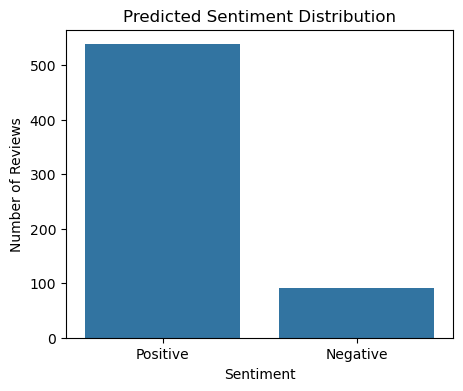

In [37]:
plt.figure(figsize=(5,4))
sns.countplot(x=y_pred)
plt.title("Predicted Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")

plt.show()

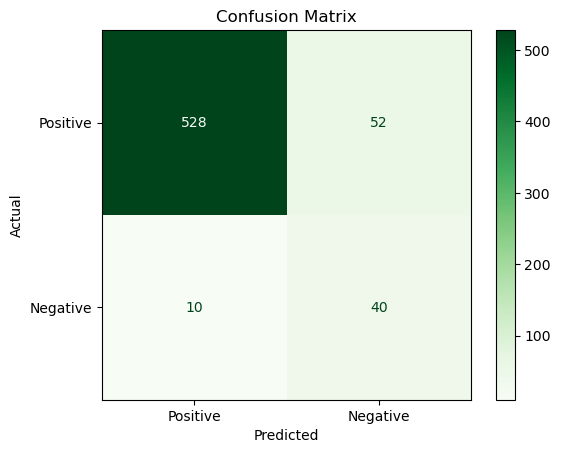

In [38]:
confusion_matrix_amazon = confusion_matrix(y_test, y_pred, labels=["Positive", "Negative"])
amazon_matrix = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_amazon, display_labels=["Positive", "Negative"])
amazon_matrix.plot(cmap='Greens')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

<div style="background-color: lightseagreen; color: black; padding: 4px;">
    <h3>Evaluation Metrics:
</h3> </div>

Evaluation metrics are tools that allow us to measure how well a machine learning model performs its asks. They provide insights into a model's accuracy, relaibility and generalizing ability as well. 

F1 score, precision and recall are better metrics than accuracy when using for classification task like this sentiment analysis. The imbalance in the distribution of the classes makes accuracy not a good metric although it is 90% in the above model. F-1 score is a better reflection of how the model handles both classes.

**Why accuracy is a bad metric here?**

Accuracy is the ratio of correct predictions, both true positives and true negatives, to the total number of predictions. 

False positives and false negatives in the minority class will not affect accuracy much.

So, accuracy is inflated to 90 percent because of the high number of positive samples in the test set.The majority class (positive) inflates the accuracy even when the model is performing poorly in the minority class(negative). So accuracy is misleading and should not be considered as a good metric in this model.

**Negative:**
1. Precision: 0.43 --> High number of false negatives. When the model predicts Negative, it is wrong more than half of the time.
2. Recall: 0.80 --> Balancing the weight across the two classes helped improve recall. The model is identifying the negatives.
3. F-1 Score: 0.56 --> Harmonic mean of precision and recall. It is low as well because precision in this class is bad.

**Positive:**
1. Precision: 0.98 --> When the model predicts positive, it is correct 98 percent of the time.
2. Recall: 0.91 --> Model correctly identified 91 percent of the actual positive reviews.
3. F-1 score: 0.94 --> Good F-1 score for this class.

My model is trying to guess too much positive because the dataset is favored towards positive. F-1 punishes the model for this even if it the model is doing great in the majority class. 

**Macro average F-1 score:**

Towards the end of the classification report, we see macro average F-1 score and weighted average f-1 score. 

Macro average F-1 score of 0.75 shows the same thing as stated above. It is the simple average of both classes's F-1 score. It won't bias among the classes.

It represents that the model is overall only average on the minority class although accuracy is high.  

It is treating both class equally and telling, "Hey so this is the overall F-1 score of the model with a fair view. Just because accuracy is high doesn't mean this model is excellent." 

**Weighted average F-1 score:**

Again, weighted meaning --> based on weight of the class, so it is inflated because the majority class (positive) is more in the data. 

It does not truly show the performance of the model while handling negative class. This can be misleading.

**Bar Plot of Predicted Sentiment Distribution:**

It can be observed that the bar for positive is very tall which reinforces the previous finding from the classification report that the model is biased towards predicting positive most of the time.

**Confusion matrix:**

Lets look at what each box in the confusion matrix means before we talk about it.
1. The top left box is the **true positive** box which is when the model correctly predicted the positive reviews as positive.
2. The bottom right box is the **true negative** box which is when the model correctly predicted the negative reviews as negative.
3. The bottom left box is the **false positive** that is when the model incorrectly predicted the negative reviews as positive.
4. The top right box is the **false negative** which is when the model incorrectly predicted the positive reviews as negative.

Model correctly predicted 528 reviews as positive ---- and incorrectly predicted 10 reviews as positive when infact those reviews were negative in reality. 

Model correctly predicted 40 reviews as negative ---- and incorrectly predicted 52 actual positive reviews as negative.

**Since model predicted 52 actual positive reviews as negative, precision was so low as discussed previously. Out of all reviews predicted as negative (40+52=92), only 40 were actual positives. So:**

**Precision = True Negatives/(True Negatives+False Negatives) = 40/92 = 0.43. This is how we got the value in the classification report above.**

<div style="background-color: lightseagreen; color: black; padding: 4px;">
    <h3>Conclusion:
</h3> </div>

This model was developed as part of learning sentiment analysis using NLP techniques. The dataset used was the Amazon customer review dataset of alexa from Kaggle. Supervised learning methods for classification like LogisticRegression was used to build the model after preprocessing the dataset using NLTK. The dataset was highly imbalanced with majority of the feedback being positive. Using the TF-IDF vectorizer and learning the concepts behind it was a great learning experience. Although I had already used LogisticRegression in the past, balancing weights between classes to improve the recall and seeing it change the results in realtime was really intriguing. The entire thought process has been documented in this documentation. Visualizing the result, creating the confusion matrix and going indepth into what it meant and how a confusion matrix shows the model performance result at a single glance was also eye-opening. In my future projects, I would like to learn more about balancing an imbalanced datasets using techniques like SMOTE or explore if there are other methods. This was a learning curve and I hope to apply a lot of this seamlessly in the projects ahead.

<div style="background-color: lightseagreen; color: black; padding: 4px; text-align: center">
    <h3>Thank you!
</h3> </div>